
## Iris Data Set - Project 2019                                  
### Programing and Scripting 
### GMIT Galway
Slawomir Sowa
12/04/2019

### Objectives

Project concern Fisher’s Iris data set. 
[Project description in PDF](https://github.com/ianmcloughlin/project-pands/raw/master/project.pdf)

1. Research background information about the data set and write a summary about it.
2. Keep a list of references you used in completing the project.
3. Download the data set and investigate it.
4. Summarise the data set by, for example, calculating the maximum, minimum and mean of each column of the data set.
5. Write a summary of your investigations.
6. Include supporting tables and graphics as you deem necessary.


### Tools

To analyse Iris Data Set I work with Python 3.7 and Jupyter Notebook.  

<img width='400px' align='left' src='https://www.python.org/static/community_logos/python-logo-master-v3-TM.png'>

<img width='150px' align='left' src='https://jupyter.org/assets/main-logo.svg'>

#### Used Libraries and tools

##### Pandas
Pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. The two primary data structures of pandas, Series (1-dimensional) and DataFrame (2-dimensional), handle the vast majority of typical use cases in finance, statistics, social science, and many areas of engineering.
[http://pandas.pydata.org](http://pandas.pydata.org)

##### NumPy
NumPy is the fundamental package for scientific computing with Python. It contains among other things: a powerful N-dimensional array object, sophisticated (broadcasting) functions, useful linear algebra, Fourier transform, and random number capabilities, Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined. This allows NumPy to seamlessly and speedily integrate with a wide variety of databases.
[https://www.numpy.org/](https://www.numpy.org/)

##### Matplotlib
Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib tries to make easy things easy and hard things possible. You can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc., with just a few lines of code. For examples, see the sample plots and thumbnail gallery.
[https://matplotlib.org/index.html](https://matplotlib.org/index.html)

##### Seaborn
Seaborn is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures. [https://seaborn.pydata.org/](https://seaborn.pydata.org/)

##### Jupyter Notebook
The Jupyter Notebook is an open-source web application that allows to create and share documents that contain live code, equations, visualizations and narrative text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more. [https://jupyter.org/index.html](https://jupyter.org/index.html)

##### statsmodels
statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.[http://www.statsmodels.org/dev/index.html](http://www.statsmodels.org/dev/index.html)

### Fisher's Iris Data Set
Sir Ronald Aylmer Fisher, byname R.A. Fisher, (born February 17, 1890, London, England—died July 29, 1962, Adelaide, Australia), British statistician and geneticist who pioneered the application of statistical procedures to the design of scientific experiments.

From the Wikipedia article “Iris flower data set” (https://en.wikipedia.org/wiki/Iris_flower_data_set)

>The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.[1] It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

>The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

### Getting Data

Iris Data Set downloaded from [www.kaggle.com](https://www.kaggle.com/saurabh00007/iriscsv)


To read data from `iris.csv` file I used `pandas` library and `read_csv` function. Variable `data` is my data frame. `data.shape` describes how many rows and columns is in data set. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot

data = pd.read_csv('Iris.csv') 
data.shape

(150, 6)

Iris Data set has 150 rows and 6 columns.

`data.head(5)` allow mi to print first 5 rows of data set.

In [2]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Our data set contains 6 columns: `ID`, `SepalLengthCm`, `SepalWidthCm`, `PetalLengthCm`, `PetalWidthCm` and `Species`. 

Firstly I explaine what Sepal and Petal Length is. 
<img width='400px' src='http://suruchifialoke.com/img/icon_iris.png'>

Sepal is longer and Petal is shorther part of iris flower. All Sepal and Petal lengths are measured in cm.  

In [3]:
data.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


`data.tail(5)` function gives me last 5 rows taken from data set. As we can see there is 150 rows. `ID` column enumerate all rows. 

Interesting things noticed in `species` column. We started with `iris-setosa` and finished with `iris-virginica`. Lets check how many different species we have in data set. 

In [4]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

By using `value_counts()` function on my data frame `data` I found 3 unique values in `Spacies` column:`Iris-setosa`, `Iris-virginica` and `Iris-versicolor` and each type occurs 50 times.    

Is worth to check is any data missing in iris data set. To do that I used `isnull()` function from `pandas` library. Function returns boolean value `True` if `null` value exists and `False` if `not null` value founded. 

In [5]:
data.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

No missing data found. <br>
Let's examine data types of each column. To do that I used `dtypes` object from `pandas` library.   

In [6]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Returned result shows that all data types are correct. In case, if we get multiple data types in single column `dtypes` return `object` data type. For column Sepal and Petal Length and Width we are expecting to get `int` or `float` data type. Column `Species` contains `string`data type, in `pandas` it's called `object` data type.    

Let's separate species. Firstly retrive iris-setosa species from data set and save it in to separate data frame `dfSetosa`. `data[data['Species'] == 'Iris-setosa']` statement compare each row in column `Species` with `Iris-setosa` object. If the same, then row is added to `dfSetosa` data frame. I do the same for `Iris-virginica` and `Iris-versicolor`.

In [7]:
dfSetosa = data[data['Species'] == 'Iris-setosa']
dfVirginica = data[data['Species'] == 'Iris-virginica']
dfVersicolor = data[data['Species'] == 'Iris-versicolor']

## Iris-Setosa Analyse

Now let's take a closer look on Iris-setosa type.  

In [8]:
dfSetosa['Species'].value_counts()

Iris-setosa    50
Name: Species, dtype: int64

`dfSetosa['Species'].value_counts()` shows that new dataframe has 50 rows and contains only Iris-Setosa type. 
Now I calucate max, min, mean and standard deviation value for Sepal and Petal length and width by using `descibe()`function, which return table.

In [9]:
dfSetosa = dfSetosa.drop(['Id'], axis = 1)
dfSetosa.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


To get better view i decided to drop `Id` column by using `DataFrame.drop()` function.<br>
I got values formated in Table and as we can see from `mean` Sepal is longer and wider than Petal for Iris Setosa Flower type.    

To show relationship between `Sepal length` and `Sepal width` of Iris Setosa type i used scatter plot. Trendline helps to make the relationship more clear. Scatter plots are sometimes called correlation plots, because they show how two variables are correlated. Plot shows low positive corelation between Sepal Lenghth and Sepal Width. 


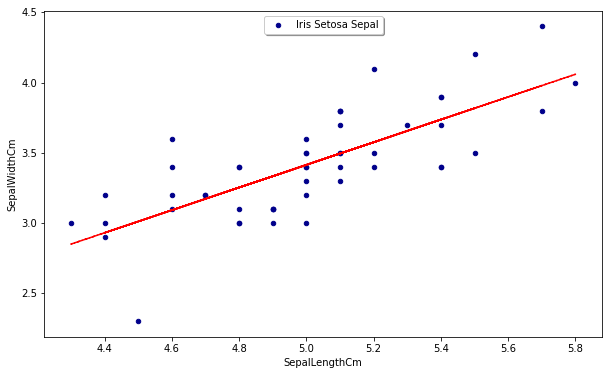

In [10]:
# Scatter plot od Sepal Length and Sepal Width
# https://chartio.com/learn/dashboards-and-charts/what-is-a-scatter-plot/
# https://www.numpy.org/devdocs/reference/generated/numpy.polynomial.polynomial.polyfit.html
# https://stackoverflow.com/a/26447505

from numpy.polynomial import Polynomial

dfSetosa.plot(
    kind='scatter', # Plot Type: linear, histogram, pie, scatter etc. 
    x='SepalLengthCm', # data on x axis 
    y='SepalWidthCm',  # data on y axis 
    color='DarkBlue',  # color
    label='Iris Setosa Sepal', # label
    figsize=(10,6)) # chart size

# Set legend
plt.legend(
    loc='upper center', # place of legend
    shadow=True, # drop shadow
    frameon = True) # frame around legend 

#Trend line plot - to calculate trendline i used polyfit and poly1d function from NumPy library. 
z = np.polyfit(dfSetosa['SepalLengthCm'], dfSetosa['SepalWidthCm'], 1)
p = np.poly1d(z)

plt.plot(dfSetosa['SepalLengthCm'],p(dfSetosa['SepalLengthCm']), "r--",)

Calculate the same for Petal Length and Petal Width for Iris Setosa type.

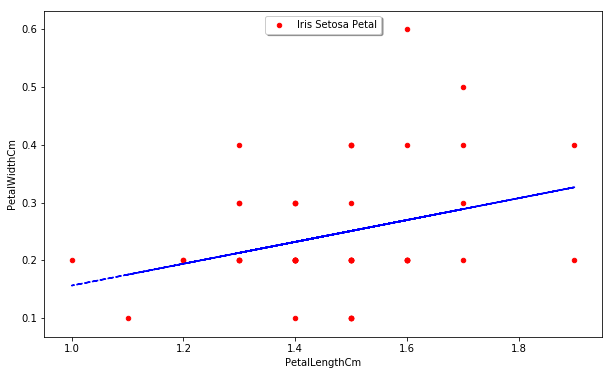

In [11]:
dfSetosa.plot(
    kind='scatter', 
    x='PetalLengthCm', 
    y='PetalWidthCm',  
    color='red',  
    label='Iris Setosa Petal',
    figsize=(10,6))

plt.legend(
    loc='upper center',  
    shadow=True, 
    frameon = True)

z = np.polyfit(dfSetosa['PetalLengthCm'], dfSetosa['PetalWidthCm'], 1)
p = np.poly1d(z)
plt.plot(dfSetosa['PetalLengthCm'],p(dfSetosa['PetalLengthCm']), "b--",)

Scatter plot with petal Length and Petal width shows no corelation. 

### Frequency Charts 
Frequency charts shows the number of instances data values appear within a dataset. To plot I used `Matplotlib` and `Pandas` library.

<Figure size 432x288 with 0 Axes>

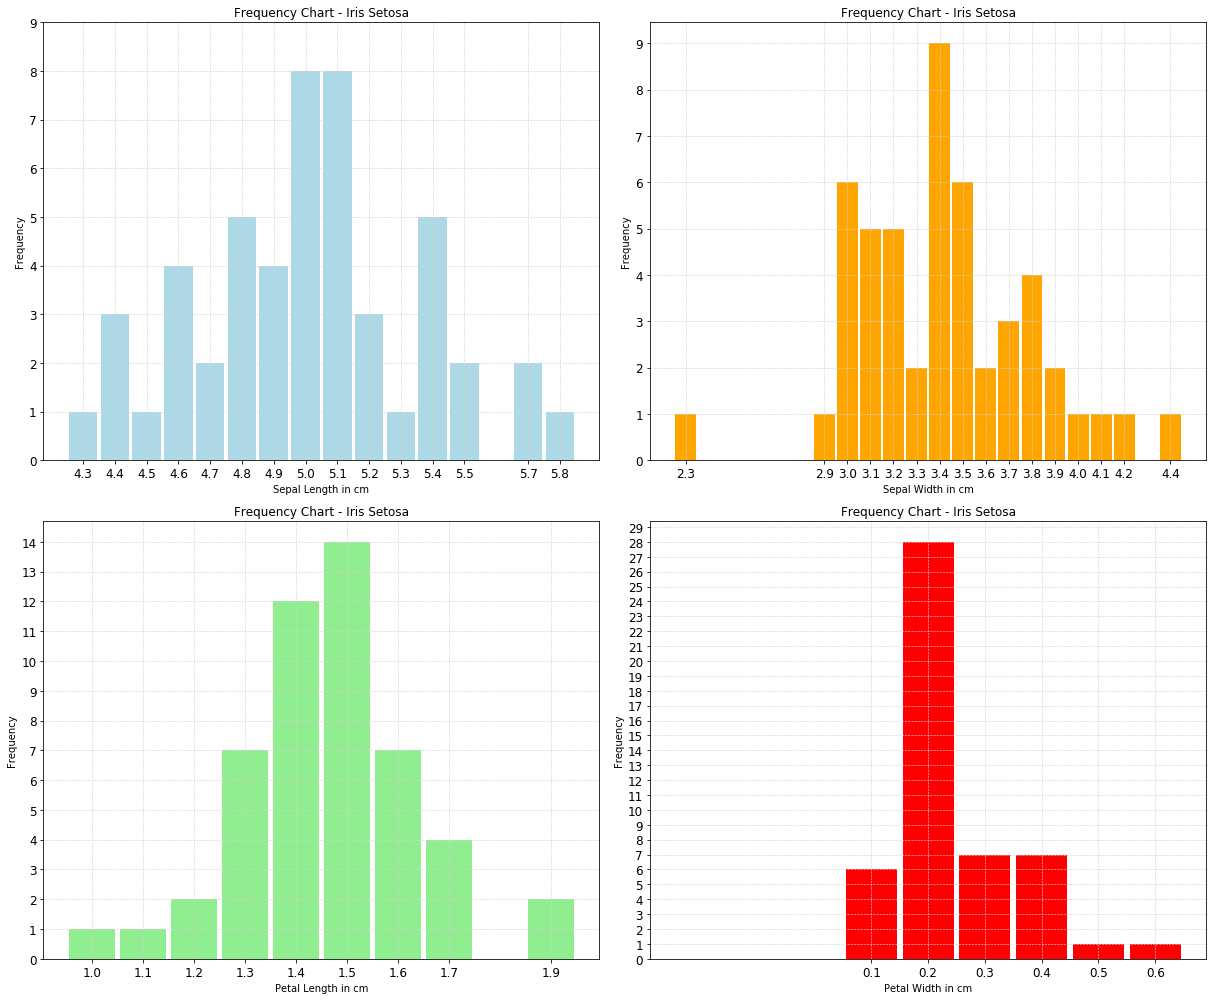

In [12]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
# https://stackoverflow.com/questions/45080698/make-frequency-histogram-from-list-with-tuple-elements/45080859#45080859
# https://medium.com/python-pandemonium/data-visualization-in-python-histogram-in-matplotlib-dce38f49f89c


plt.figure()

# Create a figure and a set of subplots with 2 columns and 2 rows.
fig, ax = plt.subplots(2,2, figsize=(17, 14))

# ax - tell us where is plot, bins to find out, rwidth - bin width, 
dfSetosa['SepalLengthCm'].plot(
    kind='hist', # what kind of plot: linear, histogram, pie, scatter etc. 
    bins=np.arange(4.25,5.9,0.1), # set bin edges, 
    rwidth=0.9, # width of bin
    ax=ax[0][0], # shows where to plot   
    xticks=pd.unique(dfSetosa['SepalLengthCm']), # set ticks on x axis, as unique values from SepalLengthCm column 
    color='lightblue', # color of histogram
    grid=True, # set grid as True
    yticks=np.arange(0,10,1), # set ticks on y axis in range from 0 to 10 with step 1
    fontsize=12) # set font size for ticks on x and y axis

dfSetosa['SepalWidthCm'].plot(
    kind='hist', 
    bins=np.arange(2.25,4.5,0.1), 
    rwidth=0.9, 
    ax=ax[0][1],
    xticks=pd.unique(dfSetosa['SepalWidthCm']),
    color='orange',
    grid=True,
    yticks=np.arange(0,10,1),
    fontsize=12)


dfSetosa['PetalLengthCm'].plot(
    kind='hist', 
    bins=np.arange(0.95,2.0,0.1), 
    rwidth=0.9, 
    ax=ax[1][0], 
    xticks=pd.unique(dfSetosa['PetalLengthCm']),
    color='lightgreen',
    grid=True,
    yticks=np.arange(0,15,1),
    fontsize=12)

dfSetosa['PetalWidthCm'].plot(
    kind='hist', 
    bins=np.arange(-0.25,0.7,0.1), 
    rwidth=0.9, 
    ax=ax[1][1],
    xticks=pd.unique(dfSetosa['PetalWidthCm']), 
    color='red',
    grid=(True),
    yticks=np.arange(0,30,1),
    fontsize=12)

# set title and axis labels
ax[0][0].set(title='Frequency Chart - Iris Setosa', xlabel = 'Sepal Length in cm' )
ax[0][1].set(title='Frequency Chart - Iris Setosa', xlabel = 'Sepal Width in cm')
ax[1][0].set(title='Frequency Chart - Iris Setosa', xlabel = 'Petal Length in cm')
ax[1][1].set(title='Frequency Chart - Iris Setosa', xlabel = 'Petal Width in cm' )

# set grid color, line style and line width
ax[0][0].grid(color='lightgrey', linestyle='--', linewidth=0.6)
ax[0][1].grid(color='lightgrey', linestyle='--', linewidth=0.6)
ax[1][0].grid(color='lightgrey', linestyle='--', linewidth=0.6)
ax[1][1].grid(color='lightgrey', linestyle='--', linewidth=0.6)

plt.tight_layout()
plt.show()

In Iris Setosa Sepal width we have value `2.3` which is significantly lower than other data points. Outliers represent unusual cases. Sometimes they represent data entry errors - Gross Errors, or perhaps data that does not belong with the other data of interest. 


### Cross Tables 
Let's check what is the percentage distribution for individual points in Iris Setosa data frame, <br>
To calcucate percentage i use `crosstab()`function from `Pandas` libreary. 

In [13]:
# http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-19_17.html

crossTable = pd.crosstab(index=dfSetosa['SepalLengthCm'], columns = 'count', )

# dataframe.count() function is used to count the umber of data points in data frame. 
# we assign result of dfSetosa.count() to variables.

sepalLengthNo, sepalWidthNo, petalLengthNo, petalWidthNo, speciesNo = dfSetosa.count()

#For better view I transpose table 
crossTable = crossTable.T

# statement below add new row 'Percent' with calculated field 
crossTable.loc['Percent [%]'] = (crossTable.loc['count']/sepalLengthNo)*100

crossTable

SepalLengthCm,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,5.3,5.4,5.5,5.7,5.8
col_0,,,,,,,,,,,,,,,
count,1.0,3.0,1.0,4.0,2.0,5.0,4.0,8.0,8.0,3.0,1.0,5.0,2.0,2.0,1.0
Percent [%],2.0,6.0,2.0,8.0,4.0,10.0,8.0,16.0,16.0,6.0,2.0,10.0,4.0,4.0,2.0


Cross Table shows that `32%` of overall Iris Setosa Sepal Length data points falls to `5.1` and `5.2` length. 

In [14]:
# Let's do the same for the remaining data
crossTable = pd.crosstab(index=dfSetosa['SepalWidthCm'], columns = 'count', )
crossTable = crossTable.T
crossTable.loc['Percent [%]'] = (crossTable.loc['count']/sepalWidthNo)
crossTable

SepalWidthCm,2.3,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.4
col_0,,,,,,,,,,,,,,,,
count,1.00,1.00,6.00,5.0,5.0,2.00,9.00,6.00,2.00,3.00,4.00,2.00,1.00,1.00,1.00,1.00
Percent [%],0.02,0.02,0.12,0.1,0.1,0.04,0.18,0.12,0.04,0.06,0.08,0.04,0.02,0.02,0.02,0.02


`18%` of overall Iris Setosa Sepal Width values falls to `3.4` cm width

In [15]:
crossTable = pd.crosstab(index=dfSetosa['PetalLengthCm'], columns = 'count', )
crossTable = crossTable.T
crossTable.loc['Percent [%]'] = (crossTable.loc['count']/petalLengthNo)
crossTable

PetalLengthCm,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.9
col_0,,,,,,,,,
count,1.00,1.00,2.00,7.00,12.00,14.00,7.00,4.00,2.00
Percent [%],0.02,0.02,0.04,0.14,0.24,0.28,0.14,0.08,0.04


`52%` of overall Iris Setosa Petal Length falls to `1.4` and `1.5` cm length.

In [16]:
crossTable = pd.crosstab(index=dfSetosa['PetalWidthCm'], columns = 'count', )
crossTable = crossTable.T
crossTable.loc['Percent [%]'] = (crossTable.loc['count']/petalWidthNo)
crossTable

PetalWidthCm,0.1,0.2,0.3,0.4,0.5,0.6
col_0,,,,,,
count,6.00,28.00,7.00,7.00,1.00,1.00
Percent [%],0.12,0.56,0.14,0.14,0.02,0.02


`56%` of overall Iris Setosa Petal Width data points falls to `0.2` cm width.

### Standard Deviation

A data set of repetitive measurements is often expressed as a single representative number called the mean or average and it is a sum of individual measurements ($x_i$) devided by the number of measurements ($N$)

$$ \bar x  = \frac {\sum x_i}{N}  $$

Deviation from the mean is the difference between the individual experimental value and the mean value. Calculated as:

$$ (x_i - \bar x) $$

    
Estimated standard deviation ($s$) from sample of population is a number used to tell how measurements for a group are spread out from the average or expected value. A low standard deviation means that most of the numbers are very close to the average. A high standard deviation means that the numbers are spread out.


$$ s = \sqrt { \frac {\sum (x_i - \bar x)^2}{N-1} } $$

Because we take a sample of population (selection taken from a bigger population of iris flowers), the number of degrees of freedom (N−1) is the total number of measurements minus one, called "Bessel's correction".

Lets calculate mean and standard deviation for Iris Setosa sepal length and width. To do that I used `numpy.mean()` and `numpy.std()` functions.

In [17]:
print('Iris Setosa Sepal Length mean =', np.round(dfSetosa['SepalLengthCm'].mean(),decimals=2)) 
print('Iris Setosa Sepal Length Standard Deviations =',np.round(dfSetosa['SepalLengthCm'].std(),decimals=2))
print()
print('Iris Setosa Sepal Width mean =',np.round(dfSetosa['SepalWidthCm'].mean(),decimals=1))
print('Iris Setosa Sepal Width Standard Deviations =',np.round(dfSetosa['SepalWidthCm'].std(),decimals=2))


Iris Setosa Sepal Length mean = 5.01
Iris Setosa Sepal Length Standard Deviations = 0.35

Iris Setosa Sepal Width mean = 3.4
Iris Setosa Sepal Width Standard Deviations = 0.38


Average size of Iris Setosa Sepal

sepal length  $$5.01 \pm 0.35 cm $$
sepal width  $$3.40 \pm 0.38 cm $$






In [18]:
print('Iris Setosa Petal Length mean =', np.round(dfSetosa['PetalLengthCm'].mean(),decimals=2)) 
print('Iris Setosa Petal Length Standard Deviations =',np.round(dfSetosa['PetalLengthCm'].std(),decimals=2))
print()
print('Iris Setosa Petal Width mean =',np.round(dfSetosa['PetalWidthCm'].mean(),decimals=1))
print('Iris Setosa Petal Width Standard Deviations =',np.round(dfSetosa['PetalWidthCm'].std(),decimals=2))

Iris Setosa Petal Length mean = 1.46
Iris Setosa Petal Length Standard Deviations = 0.17

Iris Setosa Petal Width mean = 0.2
Iris Setosa Petal Width Standard Deviations = 0.11


Avaerage size of Iris Setosa Petal

Petal length  $$ 1.46 \pm 0.17 cm $$
Petal width  $$ 0.20 \pm 0.11 cm$$

### Normal Distribution
The normal distribution is the most important and most widely used distribution in statistics. It is also called the "Gaussian curve" after the mathematician Karl Friedrich Gauss.

![img](https://www.mathsisfun.com/data/images/normal-distrubution-3sds.svg)

As we can see in Normal Distribution `68%` of data values are with in 1 standard deviation of mean, `95%` of data falls between `-2` and `2` standard deviations and `99%` of data values of data falls between `-3` and `3` standard deviations.

The probability density of the normal distribution we can calculate:

$$f(x \mid,s^{2}) = \frac{1}{\sqrt{2\pi s^{2}}}e^{-\frac {({x}-{\bar x})^2}{2s^2}} $$ 

Where $s$ - standard deviation, $\bar x$ - mean and $e$ - base of the natural logarithm (constant = 2.71828) .

**The question arises - is the distribution of data in Iris Setosa data frame is normal distributed and how to check it?**

If we take a look on Histograms of Iris Setosa Sepal and Petal values we can see a Gaussian-like shape of the data.

Popular plot for checking the distribution of a data sample is the `quantile-quantile` plot.<br>

This plot generates its own sample of the idealized distribution that we are comparing with Iris Setosa data. The idealized samples are divided into groups called quantiles. <br>

The resulting points are plotted as a scatter plot with the idealized value on the x-axis and the `SepalLengthCm` on the y-axis.<br>

A perfect match for the distribution will be shown by a line of dots on a 45-degree angle from the bottom left of the plot to the top right. A line is drawn on the plot to help make this expectation clear. Deviations by the dots from the line shows a deviation from the expected distribution.

To calculate and plot quantile - quantile charts I used `qqplot()` function from `statsmodel` library.

<Figure size 432x288 with 0 Axes>

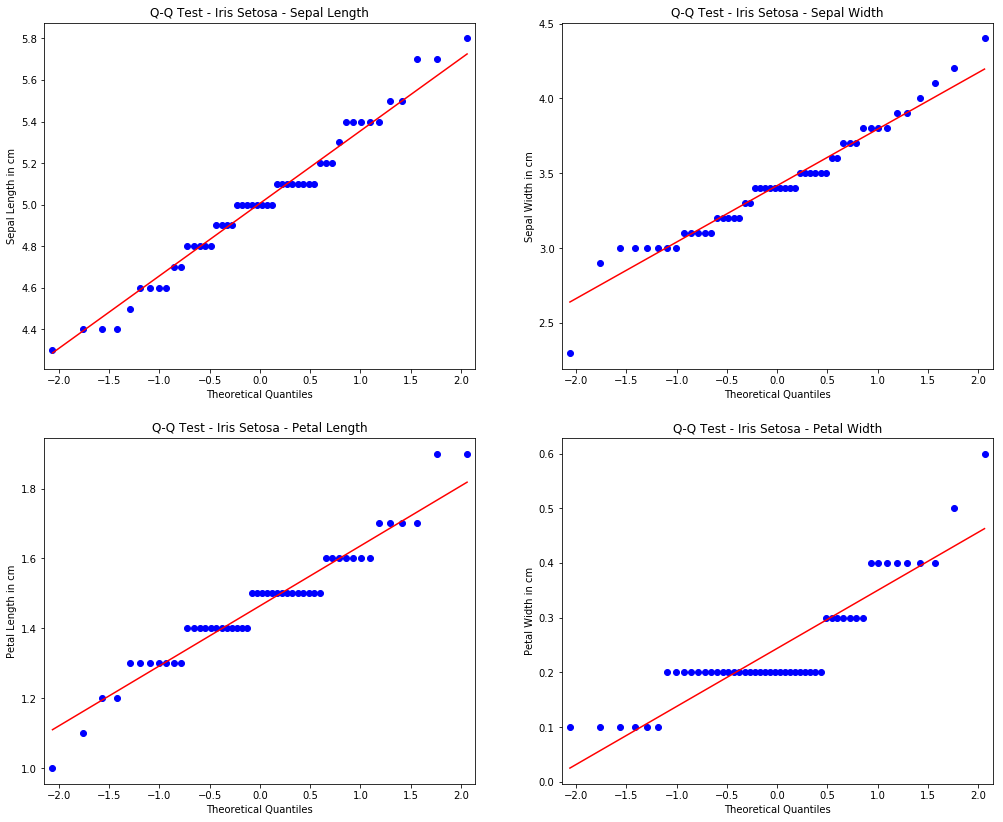

In [19]:
# https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

plt.figure()

# Create a figure and a set of subplots with 2 columns and 2 rows.
fig, ax = plt.subplots(2,2, figsize=(17, 14))

# plot qq charts with data
qqplot(dfSetosa['SepalLengthCm'],ax = ax[0][0], line='s', )
qqplot(dfSetosa['SepalWidthCm'],ax = ax[0][1], line='s', )
qqplot(dfSetosa['PetalLengthCm'],ax = ax[1][0], line='s', )
qqplot(dfSetosa['PetalWidthCm'],ax = ax[1][1], line='s', )

# set title and axis labels
ax[0][0].set(title='Q-Q Test - Iris Setosa - Sepal Length', ylabel = 'Sepal Length in cm' )
ax[0][1].set(title='Q-Q Test - Iris Setosa - Sepal Width', ylabel = 'Sepal Width in cm')
ax[1][0].set(title='Q-Q Test - Iris Setosa - Petal Length',ylabel = 'Petal Length in cm')
ax[1][1].set(title='Q-Q Test - Iris Setosa - Petal Width',ylabel = 'Petal Width in cm')

pyplot.show()

The graph does not explicitly determine whether the distribution is normal or not. We can assume that Sepal Length and Sepal Width distribution is a Gaussian Distribution. But for Petal Length and Petal Width we need more tests.

### Shapiro-Wilk Test

Sample 50 data points is too small to unambiguously determine if the distribution is in the form of a gausa curve. However, for the needs of the project we will do the Shapiro-Wilk test. In practice, the Shapiro-Wilk test is believed to be a reliable test of normality.
The `shapiro()` SciPy function will calculate the Shapiro-Wilk on our dataset.



In [20]:
# Shapiro-Wilk Test
# https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

# import shapiro() function from scipy.stats
from scipy.stats import shapiro # 

data = dfSetosa['SepalLengthCm']

# we use shapiro() on our data and assign the result to variables stat and p
stat, p = shapiro(data)

print('Statistics=%.3f, p=%.3f' % (stat, p))

# if calculated p is bigger than alpha, our data are normally distributed 

alpha = 0.05
if p > alpha:
    print('Sepal Length data looks Gaussian (fail to reject H0)')
else:
    print('Sepal Length data does not look Gaussian (reject H0)')

Statistics=0.978, p=0.460
Sepal Length data looks Gaussian (fail to reject H0)


In [21]:
# Shapiro-Wilk Test

data = dfSetosa['SepalWidthCm']
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sepal Width data looks Gaussian (fail to reject H0)')
else:
    print('Sepal Width data does not look Gaussian (reject H0)')

Statistics=0.969, p=0.205
Sepal Width data looks Gaussian (fail to reject H0)


In [22]:
# Shapiro-Wilk Test

data = dfSetosa['PetalLengthCm']
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Petal Length data looks Gaussian (fail to reject H0)')
else:
    print('Petal Length data does not look Gaussian (reject H0)')

Statistics=0.955, p=0.055
Petal Length data looks Gaussian (fail to reject H0)


In [23]:
# Shapiro-Wilk Test

data = dfSetosa['PetalWidthCm']
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Petal Width data looks Gaussian (fail to reject H0)')
else:
    print('Petal Width data does not look Gaussian (reject H0)')

Statistics=0.814, p=0.000
Petal Width data does not look Gaussian (reject H0)


Calculations show that `Sepal Length` and `Sepal Width` can be treated as normal distribution data. 

On the other hand, `Petal Length` is only slightly above alpha and result is not clear, and `Petal Width` is not a data normally distributed

### Normal Distribution Plot
Let's draw graphs of normal distribution for previously calculated averages and standard deviations.

<Figure size 432x288 with 0 Axes>

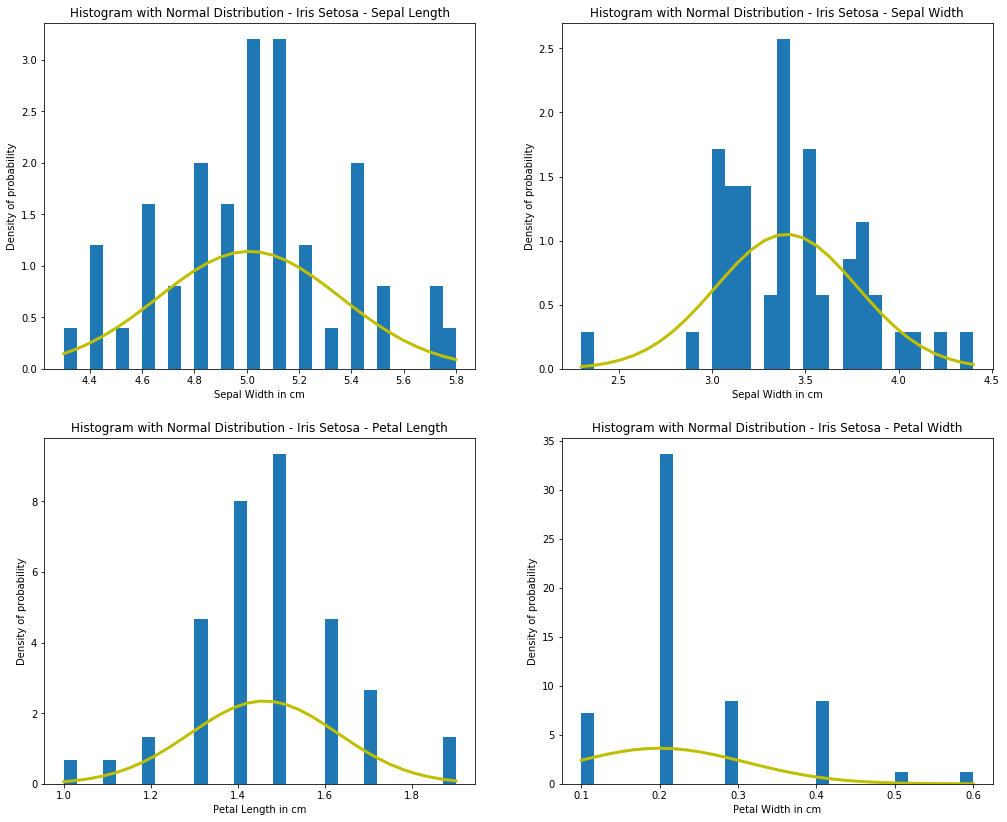

In [24]:
# https://www.tutorialspoint.com/python/python_normal_distribution.htm

plt.figure()

# Create a figure and a set of subplots with 2 columns and 2 rows.
fig, ax = plt.subplots(2,2, figsize=(17, 14))

# mean and standard deviation assigned to variables mu and s
mu, s = 5.01, 0.35

# our data
data = dfSetosa['SepalLengthCm']

# we plot a histogram from which we read bins and assign them to variable
count, bins, ignored = ax[0][0].hist(data, 30, density=True)

# Plot the distribution curve from equation
ax[0][0].plot(bins, 1/(s * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * s**2) ), linewidth=3, color='y')

# we repeat steps for remaining data
mu, sigma = 3.40, 0.38
s = dfSetosa['SepalWidthCm']
count, bins, ignored = ax[0][1].hist(s, 30, density=True)
ax[0][1].plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=3, color='y')

mu, sigma = 1.46, 0.17
s = dfSetosa['PetalLengthCm']
count, bins, ignored = ax[1][0].hist(s, 30, density=True)
ax[1][0].plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=3, color='y')

mu, sigma = 0.20, 0.11
s = dfSetosa['PetalWidthCm']
count, bins, ignored = ax[1][1].hist(s, 30, density=True)
ax[1][1].plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=3, color='y')

# set title x and y labels 
ax[0][0].set(
        title='Histogram with Normal Distribution - Iris Setosa - Sepal Length', 
        xlabel = 'Sepal Width in cm', 
        ylabel = 'Density of probability')

ax[0][1].set(
        title='Histogram with Normal Distribution - Iris Setosa - Sepal Width', 
        xlabel = 'Sepal Width in cm', 
        ylabel = 'Density of probability')

ax[1][0].set(
    title='Histogram with Normal Distribution - Iris Setosa - Petal Length',
    xlabel = 'Petal Length in cm', 
    ylabel = 'Density of probability')

ax[1][1].set(
    title='Histogram with Normal Distribution - Iris Setosa - Petal Width',
    xlabel = 'Petal Width in cm', 
    ylabel = 'Density of probability')

plt.show()

<Figure size 432x288 with 0 Axes>

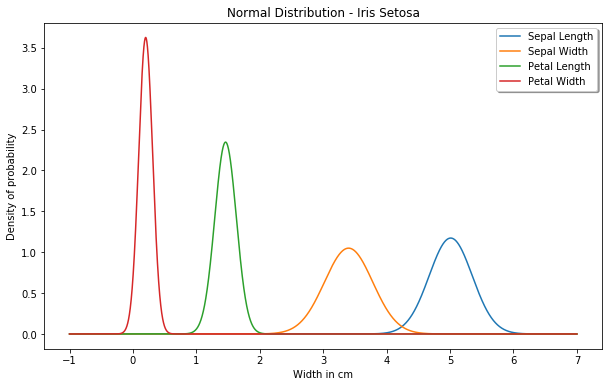

In [25]:
# https://stackoverflow.com/a/10138381/11107506

from scipy.stats import norm

plt.figure()

# Create a figure and a set of subplots with 2 columns and 2 rows.
fig, ax = plt.subplots(1,1, figsize=(10, 6))
x_axis = np.arange(-1, 7, 0.001)
ax.plot(x_axis, norm.pdf(x_axis,5.01,0.34), label = 'Sepal Length' )
ax.plot(x_axis, norm.pdf(x_axis,3.40,0.38), label = 'Sepal Width' )
ax.plot(x_axis, norm.pdf(x_axis,1.46,0.17), label = 'Petal Length' )
ax.plot(x_axis, norm.pdf(x_axis,0.20,0.11), label = 'Petal Width' )

plt.legend(
    loc='upper right',  
    shadow=True, 
    frameon = True)
ax.set(title='Normal Distribution - Iris Setosa', xlabel = 'Width in cm', ylabel = 'Density of probability')
plt.show()

Summary plot of Normal Distribution for all 4 values.  

#### Boxplot
Boxplot gives a summary of Sepal and Petal values in data set. The line that divides the box into 2 parts represents the `median` of the data. The end of the box shows the `upper quartiles` and `lower quartiles`. The extreme lines shows the `highest value` and `lowest value` excluding outliers.

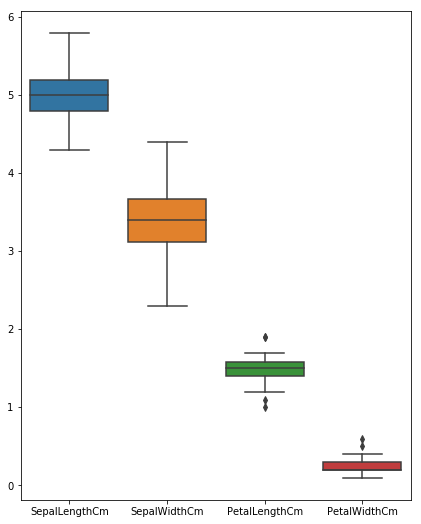

In [26]:

plt.figure(figsize=(7,9))
sns.boxplot(data=dfSetosa,)


 ## Iris-Virginica Analyse

Now I will do the same steps for Iris Virginica, the theory has been explained above, so I will skip it. Our data frame for Iris Virginica is `dfVirginica`.

In [27]:
dfVirginica['Species'].value_counts()

Iris-virginica    50
Name: Species, dtype: int64

In [28]:
dfVirginica = dfVirginica.drop(['Id'], axis = 1)
dfVirginica.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


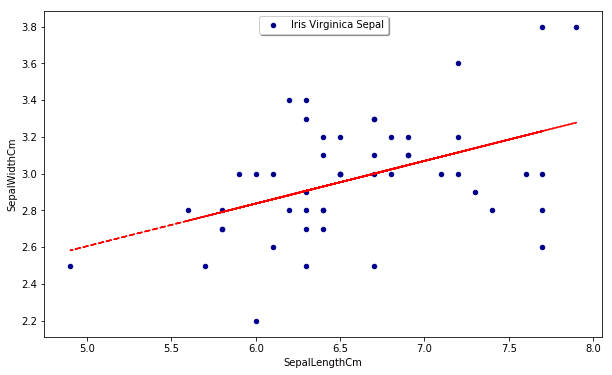

In [29]:
from numpy.polynomial import Polynomial

dfVirginica.plot(
    kind='scatter', # Plot Type: linear, histogram, pie, scatter etc. 
    x='SepalLengthCm', # data on x axis 
    y='SepalWidthCm',  # data on y axis 
    color='DarkBlue',  # color
    label='Iris Virginica Sepal', # label
    figsize=(10,6)) # chart size

# Set legend
plt.legend(
    loc='upper center', # place of legend
    shadow=True, # drop shadow
    frameon = True) # frame around legend 

#Trend line plot - to calculate trendline i used polyfit and poly1d function from NumPy library. 
z = np.polyfit(dfVirginica['SepalLengthCm'], dfVirginica['SepalWidthCm'], 1)
p = np.poly1d(z)

plt.plot(dfVirginica['SepalLengthCm'],p(dfVirginica['SepalLengthCm']), "r--",)

Scatter plot with Sepal Length and Sepal width shows no corelation.

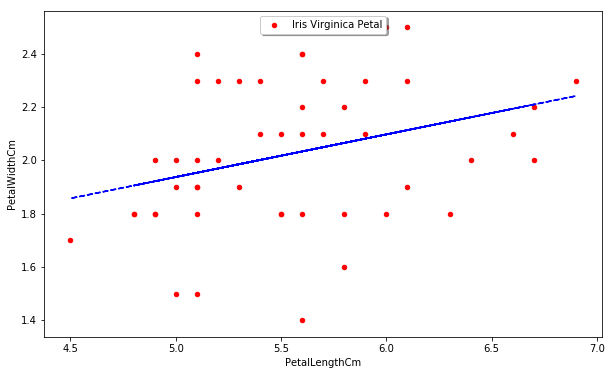

In [30]:
dfVirginica.plot(
    kind='scatter', 
    x='PetalLengthCm', 
    y='PetalWidthCm',  
    color='red',  
    label='Iris Virginica Petal',
    figsize=(10,6))

plt.legend(
    loc='upper center',  
    shadow=True, 
    frameon = True)

z = np.polyfit(dfVirginica['PetalLengthCm'], dfVirginica['PetalWidthCm'], 1)
p = np.poly1d(z)
plt.plot(dfVirginica['PetalLengthCm'],p(dfVirginica['PetalLengthCm']), "b--",)

Scatter plot with Petal Length and Petal width shows no corelation.

<Figure size 432x288 with 0 Axes>

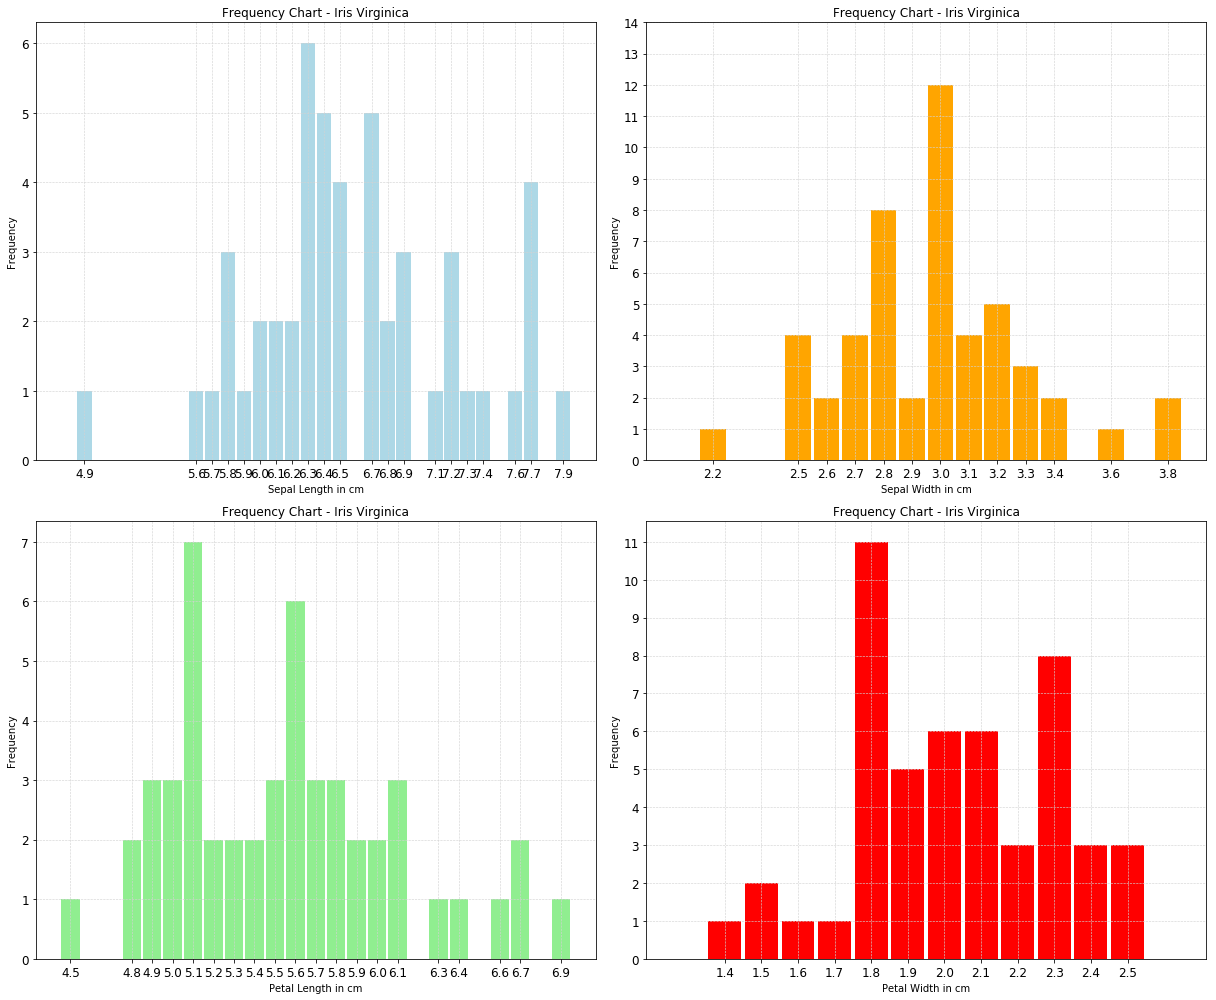

In [31]:
plt.figure()

# Create a figure and a set of subplots with 2 columns and 2 rows.
fig, ax = plt.subplots(2,2, figsize=(17, 14))

# ax - tell us where is plot, bins to find out, rwidth - bin width, 
dfVirginica['SepalLengthCm'].plot(
    kind='hist', # what kind of plot: linear, histogram, pie, scatter etc. 
    bins=np.arange(4.75,8,0.1), # set bin edges, 
    rwidth=0.9, # width of bin
    ax=ax[0][0], # shows where to plot   
    xticks=pd.unique(dfVirginica['SepalLengthCm']), # set ticks on x axis, as unique values from SepalLengthCm column 
    color='lightblue', # color of histogram
    grid=True, # set grid as True
    yticks=np.arange(0,7,1), # set ticks on y axis in range from 0 to 10 with step 1
    fontsize=12) # set font size for ticks on x and y axis

dfVirginica['SepalWidthCm'].plot(
    kind='hist', 
    bins=np.arange(2.05,3.9,0.1), 
    rwidth=0.9, 
    ax=ax[0][1],
    xticks=pd.unique(dfVirginica['SepalWidthCm']),
    color='orange',
    grid=True,
    yticks=np.arange(0,15,1),
    fontsize=12)


dfVirginica['PetalLengthCm'].plot(
    kind='hist', 
    bins=np.arange(4.45,7,0.1), 
    rwidth=0.9, 
    ax=ax[1][0], 
    xticks=pd.unique(dfVirginica['PetalLengthCm']),
    color='lightgreen',
    grid=True,
    yticks=np.arange(0,8,1),
    fontsize=12)

dfVirginica['PetalWidthCm'].plot(
    kind='hist', 
    bins=np.arange(1.25,2.7,0.1), 
    rwidth=0.9, 
    ax=ax[1][1],
    xticks=pd.unique(dfVirginica['PetalWidthCm']), 
    color='red',
    grid=(True),
    yticks=np.arange(0,12,1),
    fontsize=12)

# set title and axis labels
ax[0][0].set(title='Frequency Chart - Iris Virginica', xlabel = 'Sepal Length in cm' )
ax[0][1].set(title='Frequency Chart - Iris Virginica', xlabel = 'Sepal Width in cm')
ax[1][0].set(title='Frequency Chart - Iris Virginica', xlabel = 'Petal Length in cm')
ax[1][1].set(title='Frequency Chart - Iris Virginica', xlabel = 'Petal Width in cm' )

# set grid color, line style and line width
ax[0][0].grid(color='lightgrey', linestyle='--', linewidth=0.6)
ax[0][1].grid(color='lightgrey', linestyle='--', linewidth=0.6)
ax[1][0].grid(color='lightgrey', linestyle='--', linewidth=0.6)
ax[1][1].grid(color='lightgrey', linestyle='--', linewidth=0.6)

plt.tight_layout()
plt.show()

In Iris Virginica Sepal length we have value `4.9 cm` which is significantly lower than other data points.
Sepal Width value `2.2 cm` and Petal Length `4.5 cm` are also outliers 


In [32]:
# http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-19_17.html

crossTable = pd.crosstab(index=dfVirginica['SepalLengthCm'], columns = 'count', )

# dataframe.count() function is used to count the umber of data points in data frame. 
# we assign result of dfVirginica.count() to variables.

sepalLengthNo, sepalWidthNo, petalLengthNo, petalWidthNo, speciesNo = dfVirginica.count()

#For better view I transpose table 
crossTable = crossTable.T

# statement below add new row 'Percent' with calculated field 
crossTable.loc['Percent [%]'] = (crossTable.loc['count']/sepalLengthNo)*100

crossTable

SepalLengthCm,4.9,5.6,5.7,5.8,5.9,6.0,6.1,6.2,6.3,6.4,...,6.7,6.8,6.9,7.1,7.2,7.3,7.4,7.6,7.7,7.9
col_0,,,,,,,,,,,,,,,,,,,,,
count,1.0,1.0,1.0,3.0,1.0,2.0,2.0,2.0,6.0,5.0,...,5.0,2.0,3.0,1.0,3.0,1.0,1.0,1.0,4.0,1.0
Percent [%],2.0,2.0,2.0,6.0,2.0,4.0,4.0,4.0,12.0,10.0,...,10.0,4.0,6.0,2.0,6.0,2.0,2.0,2.0,8.0,2.0


Cross Table shows that `32%` of overall Iris Virginica Sepal Length data points falls to `6.3`, `6.4` and `6.7` length.

In [33]:
# Let's do the same for the remaining data
crossTable = pd.crosstab(index=dfVirginica['SepalWidthCm'], columns = 'count', )
crossTable = crossTable.T
crossTable.loc['Percent [%]'] = (crossTable.loc['count']/sepalWidthNo)
crossTable

SepalWidthCm,2.2,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.6,3.8
col_0,,,,,,,,,,,,,
count,1.00,4.00,2.00,4.00,8.00,2.00,12.00,4.00,5.0,3.00,2.00,1.00,2.00
Percent [%],0.02,0.08,0.04,0.08,0.16,0.04,0.24,0.08,0.1,0.06,0.04,0.02,0.04


Cross Table shows that `24%` of overall Iris Virginica Sepal width data points falls to `3 cm` length and `16%` falls to `2.8 cm` length.


In [34]:
crossTable = pd.crosstab(index=dfVirginica['PetalLengthCm'], columns = 'count', )
crossTable = crossTable.T
crossTable.loc['Percent [%]'] = (crossTable.loc['count']/petalLengthNo)
crossTable

PetalLengthCm,4.5,4.8,4.9,5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6.0,6.1,6.3,6.4,6.6,6.7,6.9
col_0,,,,,,,,,,,,,,,,,,,,
count,1.00,2.00,3.00,3.00,7.00,2.00,2.00,2.00,3.00,6.00,3.00,3.00,2.00,2.00,3.00,1.00,1.00,1.00,2.00,1.00
Percent [%],0.02,0.04,0.06,0.06,0.14,0.04,0.04,0.04,0.06,0.12,0.06,0.06,0.04,0.04,0.06,0.02,0.02,0.02,0.04,0.02


Cross Table shows that `14%` of overall Iris Virginica Petal Length data points falls to 5.1 cm length.

In [35]:
crossTable = pd.crosstab(index=dfVirginica['PetalWidthCm'], columns = 'count', )
crossTable = crossTable.T
crossTable.loc['Percent [%]'] = (crossTable.loc['count']/petalWidthNo)
crossTable

PetalWidthCm,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5
col_0,,,,,,,,,,,,
count,1.00,2.00,1.00,1.00,11.00,5.0,6.00,6.00,3.00,8.00,3.00,3.00
Percent [%],0.02,0.04,0.02,0.02,0.22,0.1,0.12,0.12,0.06,0.16,0.06,0.06


Cross Table shows that `22%` of overall Iris Virginica Petal Width data points falls to `1.8 cm` length.

In [36]:
print('Iris Virginica Sepal Length mean =', np.round(dfVirginica['SepalLengthCm'].mean(),decimals=2)) 
print('Iris Virginica Sepal Length Standard Deviations =',np.round(dfVirginica['SepalLengthCm'].std(),decimals=2))
print()
print('Iris Virginica Sepal Width mean =',np.round(dfVirginica['SepalWidthCm'].mean(),decimals=1))
print('Iris Virginica Sepal Width Standard Deviations =',np.round(dfVirginica['SepalWidthCm'].std(),decimals=2))

Iris Virginica Sepal Length mean = 6.59
Iris Virginica Sepal Length Standard Deviations = 0.64

Iris Virginica Sepal Width mean = 3.0
Iris Virginica Sepal Width Standard Deviations = 0.32


Average size of Iris Virginica Sepal

sepal length  $$6.59 \pm 0.64 cm $$
sepal width  $$3.00 \pm 0.32 cm $$

In [37]:
print('Iris Virginica Petal Length mean =', np.round(dfVirginica['PetalLengthCm'].mean(),decimals=2)) 
print('Iris Virginica Petal Length Standard Deviations =',np.round(dfVirginica['PetalLengthCm'].std(),decimals=2))
print()
print('Iris Virginica Petal Width mean =',np.round(dfVirginica['PetalWidthCm'].mean(),decimals=1))
print('Iris Virginica Petal Width Standard Deviations =',np.round(dfVirginica['PetalWidthCm'].std(),decimals=2))

Iris Virginica Petal Length mean = 5.55
Iris Virginica Petal Length Standard Deviations = 0.55

Iris Virginica Petal Width mean = 2.0
Iris Virginica Petal Width Standard Deviations = 0.27


Average size of Iris Virginica Petal

Petal length  $$5.55 \pm 0.55 cm $$
Petal width  $$2.00 \pm 0.27 cm $$

<Figure size 432x288 with 0 Axes>

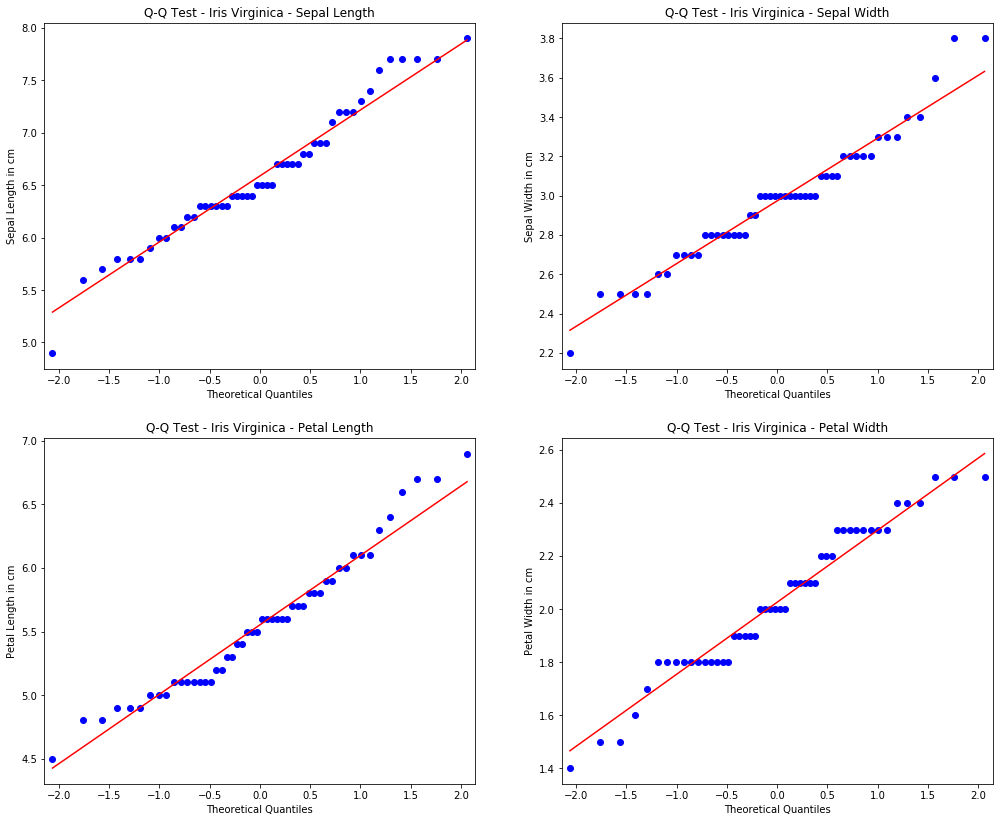

In [38]:
# https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

plt.figure()

# Create a figure and a set of subplots with 2 columns and 2 rows.
fig, ax = plt.subplots(2,2, figsize=(17, 14))

# plot qq charts with data
qqplot(dfVirginica['SepalLengthCm'],ax = ax[0][0], line='s', )
qqplot(dfVirginica['SepalWidthCm'],ax = ax[0][1], line='s', )
qqplot(dfVirginica['PetalLengthCm'],ax = ax[1][0], line='s', )
qqplot(dfVirginica['PetalWidthCm'],ax = ax[1][1], line='s', )

# set title and axis labels
ax[0][0].set(title='Q-Q Test - Iris Virginica - Sepal Length', ylabel = 'Sepal Length in cm' )
ax[0][1].set(title='Q-Q Test - Iris Virginica - Sepal Width', ylabel = 'Sepal Width in cm')
ax[1][0].set(title='Q-Q Test - Iris Virginica - Petal Length',ylabel = 'Petal Length in cm')
ax[1][1].set(title='Q-Q Test - Iris Virginica - Petal Width',ylabel = 'Petal Width in cm')

pyplot.show()

From the above graphs it can be read that all 4 values have a Normal Distribution. To confirm let's do Shapiro-Wilk test:

In [39]:
# Shapiro-Wilk Test
# https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

# import shapiro() function from scipy.stats
from scipy.stats import shapiro # 

data = dfVirginica['SepalLengthCm']

# we use shapiro() on our data and assign the result to variables stat and p
stat, p = shapiro(data)

print('Statistics=%.3f, p=%.3f' % (stat, p))

# if calculated p is bigger than alpha, our data are normally distributed 

alpha = 0.05
if p > alpha:
    print('Sepal Length data looks Gaussian (fail to reject H0)')
else:
    print('Sepal Length data does not look Gaussian (reject H0)')

Statistics=0.971, p=0.258
Sepal Length data looks Gaussian (fail to reject H0)


In [40]:
# Shapiro-Wilk Test

data = dfVirginica['SepalWidthCm']
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sepal Width data looks Gaussian (fail to reject H0)')
else:
    print('Sepal Width data does not look Gaussian (reject H0)')

Statistics=0.967, p=0.181
Sepal Width data looks Gaussian (fail to reject H0)


In [41]:
# Shapiro-Wilk Test

data = dfVirginica['PetalLengthCm']
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Petal Length data looks Gaussian (fail to reject H0)')
else:
    print('Petal Length data does not look Gaussian (reject H0)')

Statistics=0.962, p=0.110
Petal Length data looks Gaussian (fail to reject H0)


In [42]:
# Shapiro-Wilk Test

data = dfVirginica['PetalWidthCm']
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Petal Width data looks Gaussian (fail to reject H0)')
else:
    print('Petal Width data does not look Gaussian (reject H0)')

Statistics=0.960, p=0.087
Petal Width data looks Gaussian (fail to reject H0)


Test shows that all Sepal and Petal values for Iris Virginica looks like Gaussian distribution. 

<Figure size 432x288 with 0 Axes>

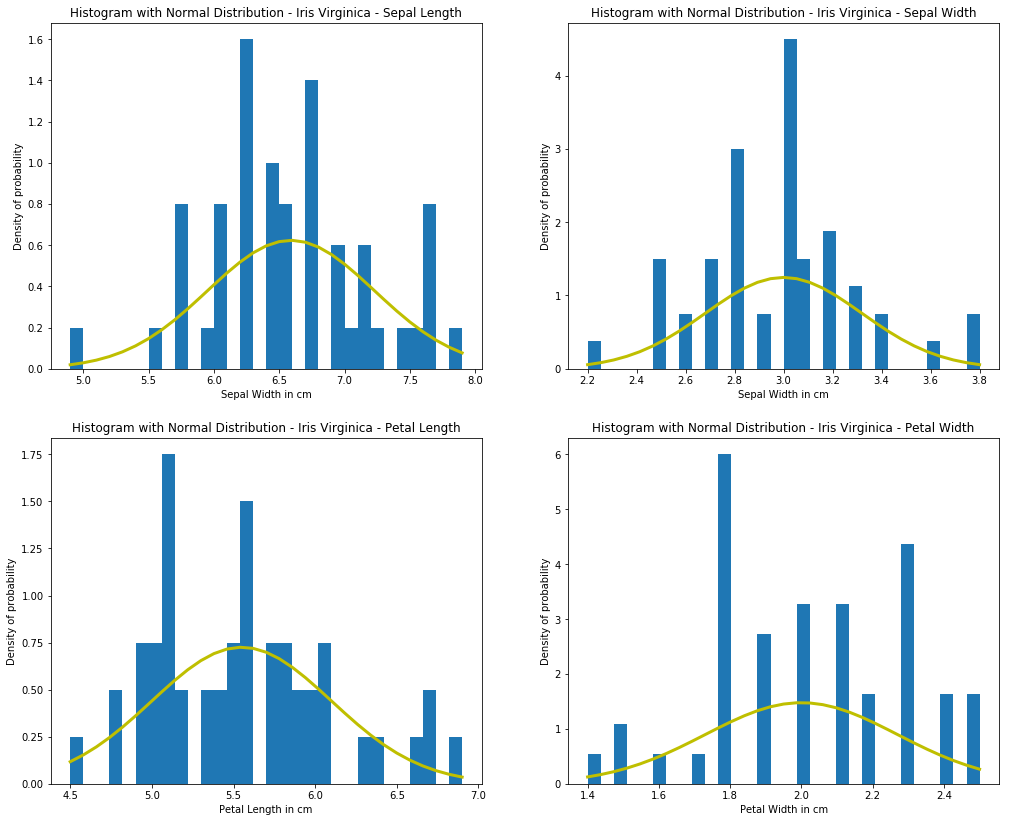

In [43]:
# https://www.tutorialspoint.com/python/python_normal_distribution.htm

plt.figure()

# Create a figure and a set of subplots with 2 columns and 2 rows.
fig, ax = plt.subplots(2,2, figsize=(17, 14))

# mean and standard deviation assigned to variables mu and s
mu, s = 6.59, 0.64

# our data
data = dfVirginica['SepalLengthCm']

# we plot a histogram from which we read bins and assign them to variable
count, bins, ignored = ax[0][0].hist(data, 30, density=True)

# Plot the distribution curve from equation
ax[0][0].plot(bins, 1/(s * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * s**2) ), linewidth=3, color='y')

# we repeat steps for remaining data
mu, sigma = 3.0, 0.32
s = dfVirginica['SepalWidthCm']
count, bins, ignored = ax[0][1].hist(s, 30, density=True)
ax[0][1].plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=3, color='y')

mu, sigma = 5.55, 0.55
s = dfVirginica['PetalLengthCm']
count, bins, ignored = ax[1][0].hist(s, 30, density=True)
ax[1][0].plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=3, color='y')

mu, sigma = 2.0, 0.27
s = dfVirginica['PetalWidthCm']
count, bins, ignored = ax[1][1].hist(s, 30, density=True)
ax[1][1].plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=3, color='y')

ax[0][0].set(
        title='Histogram with Normal Distribution - Iris Virginica - Sepal Length', 
        xlabel = 'Sepal Width in cm', 
        ylabel = 'Density of probability')

ax[0][1].set(
        title='Histogram with Normal Distribution - Iris Virginica - Sepal Width', 
        xlabel = 'Sepal Width in cm', 
        ylabel = 'Density of probability')

ax[1][0].set(
    title='Histogram with Normal Distribution - Iris Virginica - Petal Length',
    xlabel = 'Petal Length in cm', 
    ylabel = 'Density of probability')

ax[1][1].set(
    title='Histogram with Normal Distribution - Iris Virginica - Petal Width',
    xlabel = 'Petal Width in cm', 
    ylabel = 'Density of probability')

plt.show()

<Figure size 432x288 with 0 Axes>

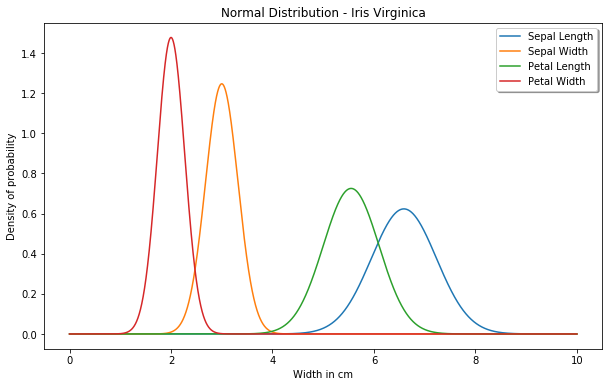

In [44]:
# https://stackoverflow.com/a/10138381/11107506

from scipy.stats import norm

plt.figure()

# Create a figure and a set of subplots with 2 columns and 2 rows.
fig, ax = plt.subplots(1,1, figsize=(10, 6))
x_axis = np.arange(0, 10, 0.001)
ax.plot(x_axis, norm.pdf(x_axis,6.59, 0.64), label = 'Sepal Length' )
ax.plot(x_axis, norm.pdf(x_axis,3.0, 0.32), label = 'Sepal Width' )
ax.plot(x_axis, norm.pdf(x_axis,5.55, 0.55), label = 'Petal Length' )
ax.plot(x_axis, norm.pdf(x_axis,2.0, 0.27), label = 'Petal Width' )

plt.legend(
    loc='upper right',  
    shadow=True, 
    frameon = True)
ax.set(title='Normal Distribution - Iris Virginica', xlabel = 'Width in cm', ylabel = 'Density of probability')
plt.show()

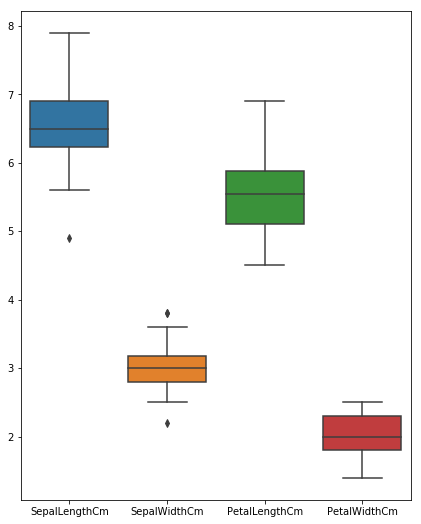

In [45]:
plt.figure(figsize=(7,9))
sns.boxplot(data=dfVirginica,)

### Iris-Versicolor Analyse

In [46]:
dfVersicolor['Species'].value_counts()

Iris-versicolor    50
Name: Species, dtype: int64

In [47]:
dfVersicolor = dfVersicolor.drop(['Id'], axis = 1)
dfVersicolor.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


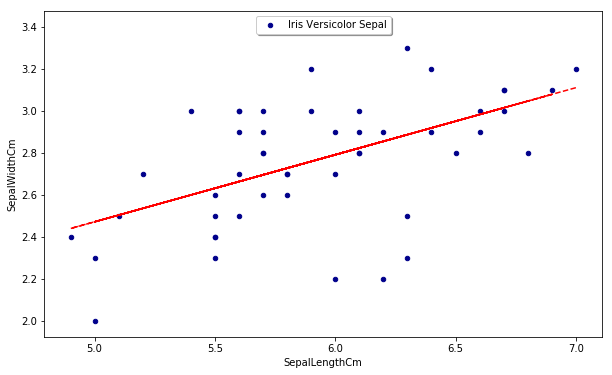

In [48]:
# Scatter plot od Sepal Length and Sepal Width
# https://chartio.com/learn/dashboards-and-charts/what-is-a-scatter-plot/
# https://www.numpy.org/devdocs/reference/generated/numpy.polynomial.polynomial.polyfit.html
# https://stackoverflow.com/a/26447505

from numpy.polynomial import Polynomial

dfVersicolor.plot(
    kind='scatter', # Plot Type: linear, histogram, pie, scatter etc. 
    x='SepalLengthCm', # data on x axis 
    y='SepalWidthCm',  # data on y axis 
    color='DarkBlue',  # color
    label='Iris Versicolor Sepal', # label
    figsize=(10,6)) # chart size

# Set legend
plt.legend(
    loc='upper center', # place of legend
    shadow=True, # drop shadow
    frameon = True) # frame around legend 

#Trend line plot - to calculate trendline i used polyfit and poly1d function from NumPy library. 
z = np.polyfit(dfVersicolor['SepalLengthCm'], dfVersicolor['SepalWidthCm'], 1)
p = np.poly1d(z)

plt.plot(dfVersicolor['SepalLengthCm'],p(dfVersicolor['SepalLengthCm']), "r--",)

Plot Shows no corelation between Sepal Length and Sepal Width for Iris Versicolor.

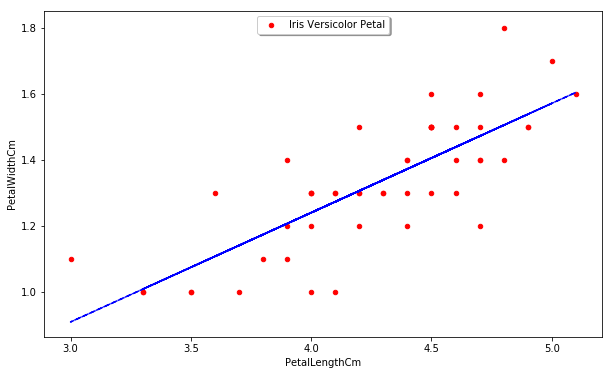

In [49]:
dfVersicolor.plot(
    kind='scatter', 
    x='PetalLengthCm', 
    y='PetalWidthCm',  
    color='red',  
    label='Iris Versicolor Petal',
    figsize=(10,6))

plt.legend(
    loc='upper center',  
    shadow=True, 
    frameon = True)

z = np.polyfit(dfVersicolor['PetalLengthCm'], dfVersicolor['PetalWidthCm'], 1)
p = np.poly1d(z)
plt.plot(dfVersicolor['PetalLengthCm'],p(dfVersicolor['PetalLengthCm']), "b--",)

Plot shows low positive corelation between Petal Lenghth and Petal Width for Iris Versicolor.

<Figure size 432x288 with 0 Axes>

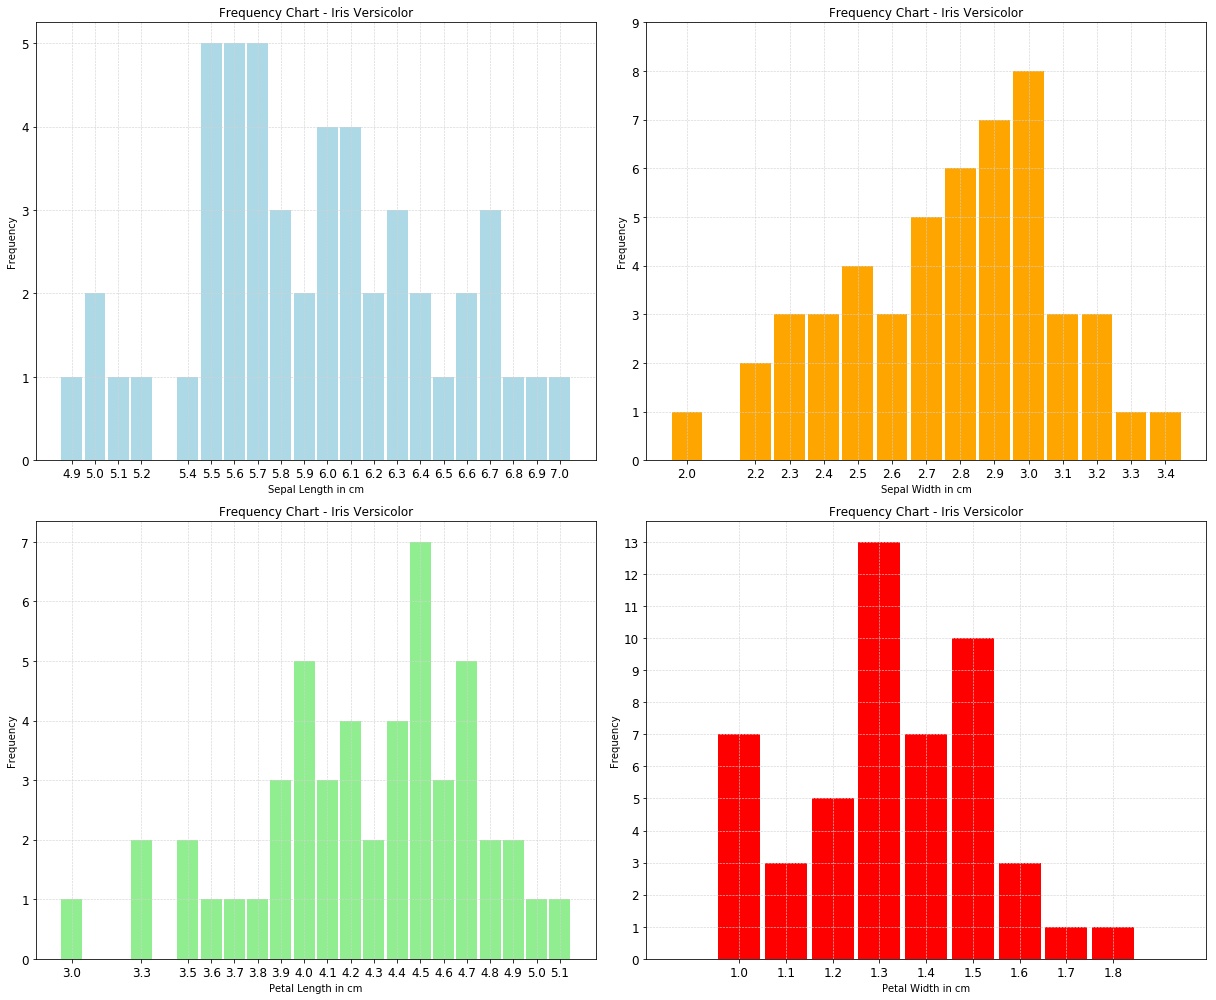

In [50]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
# https://stackoverflow.com/questions/45080698/make-frequency-histogram-from-list-with-tuple-elements/45080859#45080859
# https://medium.com/python-pandemonium/data-visualization-in-python-histogram-in-matplotlib-dce38f49f89c


plt.figure()

# Create a figure and a set of subplots with 2 columns and 2 rows.
fig, ax = plt.subplots(2,2, figsize=(17, 14))

# ax - tell us where is plot, bins to find out, rwidth - bin width, 
dfVersicolor['SepalLengthCm'].plot(
    kind='hist', # what kind of plot: linear, histogram, pie, scatter etc. 
    bins=np.arange(4.85,7.1,0.1), # set bin edges, 
    rwidth=0.9, # width of bin
    ax=ax[0][0], # shows where to plot   
    xticks=pd.unique(dfVersicolor['SepalLengthCm']), # set ticks on x axis, as unique values from SepalLengthCm column 
    color='lightblue', # color of histogram
    grid=True, # set grid as True
    yticks=np.arange(0,6,1), # set ticks on y axis in range from 0 to 10 with step 1
    fontsize=12) # set font size for ticks on x and y axis

dfVersicolor['SepalWidthCm'].plot(
    kind='hist', 
    bins=np.arange(1.95,3.5,0.1), 
    rwidth=0.9, 
    ax=ax[0][1],
    xticks=pd.unique(dfVersicolor['SepalWidthCm']),
    color='orange',
    grid=True,
    yticks=np.arange(0,10,1),
    fontsize=12)


dfVersicolor['PetalLengthCm'].plot(
    kind='hist', 
    bins=np.arange(2.95,5.2,0.1), 
    rwidth=0.9, 
    ax=ax[1][0], 
    xticks=pd.unique(dfVersicolor['PetalLengthCm']),
    color='lightgreen',
    grid=True,
    yticks=np.arange(0,8,1),
    fontsize=12)

dfVersicolor['PetalWidthCm'].plot(
    kind='hist', 
    bins=np.arange(0.85,2.0,0.1), 
    rwidth=0.9, 
    ax=ax[1][1],
    xticks=pd.unique(dfVersicolor['PetalWidthCm']), 
    color='red',
    grid=(True),
    yticks=np.arange(0,14,1),
    fontsize=12)

# set title and axis labels
ax[0][0].set(title='Frequency Chart - Iris Versicolor', xlabel = 'Sepal Length in cm' )
ax[0][1].set(title='Frequency Chart - Iris Versicolor', xlabel = 'Sepal Width in cm')
ax[1][0].set(title='Frequency Chart - Iris Versicolor', xlabel = 'Petal Length in cm')
ax[1][1].set(title='Frequency Chart - Iris Versicolor', xlabel = 'Petal Width in cm' )

# set grid color, line style and line width
ax[0][0].grid(color='lightgrey', linestyle='--', linewidth=0.6)
ax[0][1].grid(color='lightgrey', linestyle='--', linewidth=0.6)
ax[1][0].grid(color='lightgrey', linestyle='--', linewidth=0.6)
ax[1][1].grid(color='lightgrey', linestyle='--', linewidth=0.6)

plt.tight_layout()
plt.show()

In [51]:
# http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-19_17.html

crossTable = pd.crosstab(index=dfVersicolor['SepalLengthCm'], columns = 'count', )

# dataframe.count() function is used to count the umber of data points in data frame. 
# we assign result of dfSetosa.count() to variables.

sepalLengthNo, sepalWidthNo, petalLengthNo, petalWidthNo, speciesNo = dfVersicolor.count()

#For better view I transpose table 
crossTable = crossTable.T

# statement below add new row 'Percent' with calculated field 
crossTable.loc['Percent [%]'] = (crossTable.loc['count']/sepalLengthNo)*100

crossTable

SepalLengthCm,4.9,5.0,5.1,5.2,5.4,5.5,5.6,5.7,5.8,5.9,...,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7.0
col_0,,,,,,,,,,,,,,,,,,,,,
count,1.0,2.0,1.0,1.0,1.0,5.0,5.0,5.0,3.0,2.0,...,4.0,2.0,3.0,2.0,1.0,2.0,3.0,1.0,1.0,1.0
Percent [%],2.0,4.0,2.0,2.0,2.0,10.0,10.0,10.0,6.0,4.0,...,8.0,4.0,6.0,4.0,2.0,4.0,6.0,2.0,2.0,2.0


Cross Table shows that `30%` of overall Iris Versicolor Sepal Length data points falls to `5.5 cm`, `5.6 cm` and `5.7 cm` length.

In [52]:
# Let's do the same for the remaining data
crossTable = pd.crosstab(index=dfVersicolor['SepalWidthCm'], columns = 'count', )
crossTable = crossTable.T
crossTable.loc['Percent [%]'] = (crossTable.loc['count']/sepalWidthNo)
crossTable

SepalWidthCm,2.0,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4
col_0,,,,,,,,,,,,,,
count,1.00,2.00,3.00,3.00,4.00,3.00,5.0,6.00,7.00,8.00,3.00,3.00,1.00,1.00
Percent [%],0.02,0.04,0.06,0.06,0.08,0.06,0.1,0.12,0.14,0.16,0.06,0.06,0.02,0.02


Cross Table shows that `42%` of overall Iris Versicolor Sepal Width data points falls to `2.8 cm`, `2.9 cm` and `3.0 cm` length.

In [53]:
crossTable = pd.crosstab(index=dfVersicolor['PetalLengthCm'], columns = 'count', )
crossTable = crossTable.T
crossTable.loc['Percent [%]'] = (crossTable.loc['count']/petalLengthNo)
crossTable

PetalLengthCm,3.0,3.3,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1
col_0,,,,,,,,,,,,,,,,,,,
count,1.00,2.00,2.00,1.00,1.00,1.00,3.00,5.0,3.00,4.00,2.00,4.00,7.00,3.00,5.0,2.00,2.00,1.00,1.00
Percent [%],0.02,0.04,0.04,0.02,0.02,0.02,0.06,0.1,0.06,0.08,0.04,0.08,0.14,0.06,0.1,0.04,0.04,0.02,0.02


Cross Table shows that `14%` of overall Iris Versicolor Petal Length data points falls to `4.5 cm` length.

In [54]:
crossTable = pd.crosstab(index=dfVersicolor['PetalWidthCm'], columns = 'count', )
crossTable = crossTable.T
crossTable.loc['Percent [%]'] = (crossTable.loc['count']/petalWidthNo)
crossTable

PetalWidthCm,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8
col_0,,,,,,,,,
count,7.00,3.00,5.0,13.00,7.00,10.0,3.00,1.00,1.00
Percent [%],0.14,0.06,0.1,0.26,0.14,0.2,0.06,0.02,0.02


Cross Table shows that `40%` of overall Iris Versicolor Petal Width data points falls to `1.3 cm` and `1.4 cm` length.

In [55]:
print('Iris Versicolor Sepal Length mean =', np.round(dfVersicolor['SepalLengthCm'].mean(),decimals=2)) 
print('Iris Versicolor Sepal Length Standard Deviations =',np.round(dfVersicolor['SepalLengthCm'].std(),decimals=2))
print()
print('Iris Versicolor Sepal Width mean =',np.round(dfVersicolor['SepalWidthCm'].mean(),decimals=1))
print('Iris Versicolor Sepal Width Standard Deviations =',np.round(dfVersicolor['SepalWidthCm'].std(),decimals=2))

Iris Versicolor Sepal Length mean = 5.94
Iris Versicolor Sepal Length Standard Deviations = 0.52

Iris Versicolor Sepal Width mean = 2.8
Iris Versicolor Sepal Width Standard Deviations = 0.31


Average size of Iris Virginica Petal

sepal length  $$5.94 \pm 0.52 cm $$
sepal width  $$2.80 \pm 0.31 cm $$

In [56]:
print('Iris Versicolor Petal Length mean =', np.round(dfVersicolor['PetalLengthCm'].mean(),decimals=2)) 
print('Iris Versicolor Petal Length Standard Deviations =',np.round(dfVersicolor['PetalLengthCm'].std(),decimals=2))
print()
print('Iris Versicolor Petal Width mean =',np.round(dfVersicolor['PetalWidthCm'].mean(),decimals=1))
print('Iris Versicolor Petal Width Standard Deviations =',np.round(dfVersicolor['PetalWidthCm'].std(),decimals=2))

Iris Versicolor Petal Length mean = 4.26
Iris Versicolor Petal Length Standard Deviations = 0.47

Iris Versicolor Petal Width mean = 1.3
Iris Versicolor Petal Width Standard Deviations = 0.2


Average size of Iris Virginica Petal

Petal length  $$4.26 \pm 0.47 cm $$
Petal width  $$1.30 \pm 0.20 cm $$

<Figure size 432x288 with 0 Axes>

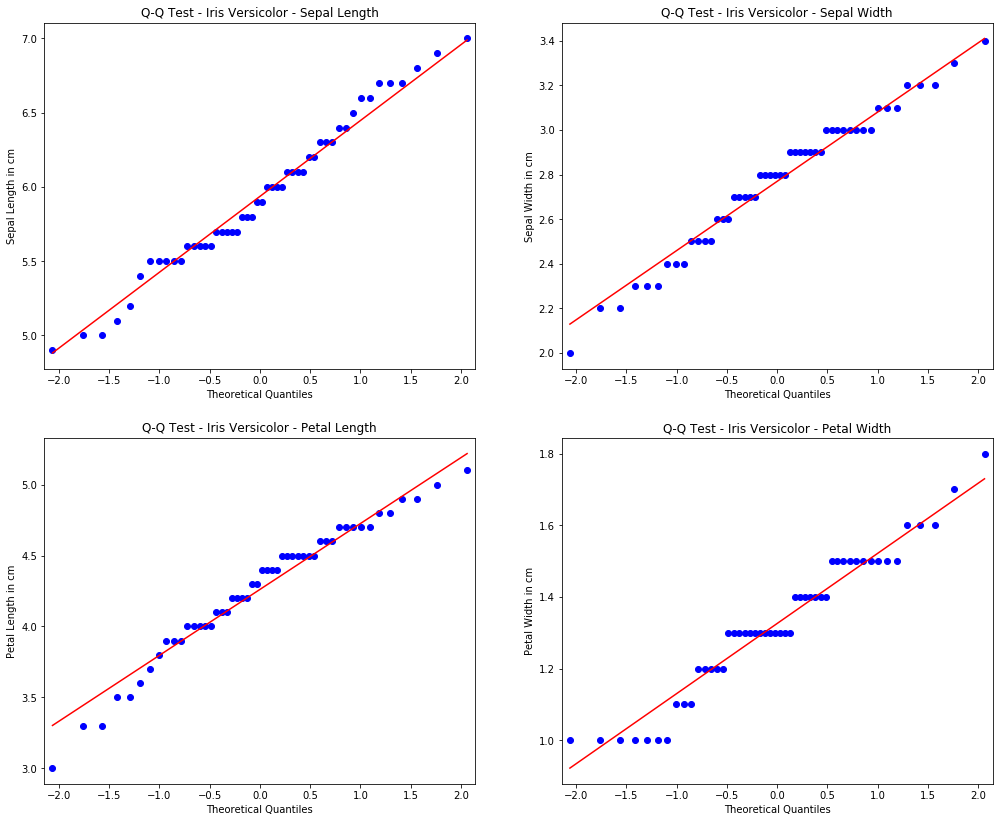

In [57]:
# https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

plt.figure()

# Create a figure and a set of subplots with 2 columns and 2 rows.
fig, ax = plt.subplots(2,2, figsize=(17, 14))

# plot qq charts with data
qqplot(dfVersicolor['SepalLengthCm'],ax = ax[0][0], line='s', )
qqplot(dfVersicolor['SepalWidthCm'],ax = ax[0][1], line='s', )
qqplot(dfVersicolor['PetalLengthCm'],ax = ax[1][0], line='s', )
qqplot(dfVersicolor['PetalWidthCm'],ax = ax[1][1], line='s', )

# set title and axis labels
ax[0][0].set(title='Q-Q Test - Iris Versicolor - Sepal Length', ylabel = 'Sepal Length in cm' )
ax[0][1].set(title='Q-Q Test - Iris Versicolor - Sepal Width', ylabel = 'Sepal Width in cm')
ax[1][0].set(title='Q-Q Test - Iris Versicolor - Petal Length',ylabel = 'Petal Length in cm')
ax[1][1].set(title='Q-Q Test - Iris Versicolor - Petal Width',ylabel = 'Petal Width in cm')

pyplot.show()

In [58]:
# Shapiro-Wilk Test
# https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

# import shapiro() function from scipy.stats
from scipy.stats import shapiro # 

data = dfVersicolor['SepalLengthCm']

# we use shapiro() on our data and assign the result to variables stat and p
stat, p = shapiro(data)

print('Statistics=%.3f, p=%.3f' % (stat, p))

# if calculated p is bigger than alpha, our data are normally distributed 

alpha = 0.05
if p > alpha:
    print('Sepal Length data looks Gaussian (fail to reject H0)')
else:
    print('Sepal Length data does not look Gaussian (reject H0)')

Statistics=0.978, p=0.465
Sepal Length data looks Gaussian (fail to reject H0)


In [59]:
# Shapiro-Wilk Test

data = dfVersicolor['SepalWidthCm']
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sepal Width data looks Gaussian (fail to reject H0)')
else:
    print('Sepal Width data does not look Gaussian (reject H0)')

Statistics=0.974, p=0.338
Sepal Width data looks Gaussian (fail to reject H0)


In [60]:
# Shapiro-Wilk Test

data = dfVersicolor['PetalLengthCm']
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Petal Length data looks Gaussian (fail to reject H0)')
else:
    print('Petal Length data does not look Gaussian (reject H0)')

Statistics=0.966, p=0.158
Petal Length data looks Gaussian (fail to reject H0)


In [61]:
# Shapiro-Wilk Test

data = dfVersicolor['PetalWidthCm']
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Petal Width data looks Gaussian (fail to reject H0)')
else:
    print('Petal Width data does not look Gaussian (reject H0)')

Statistics=0.948, p=0.027
Petal Width data does not look Gaussian (reject H0)


From Q-Q test plots and Shapiro-Wilk Test we can deduce that Petal Length, Sepal Length and Sepal Width are normally distributed.
Petal Width has p-value lower than alpha, which mean that data are not Gaussian distributed. 

<Figure size 432x288 with 0 Axes>

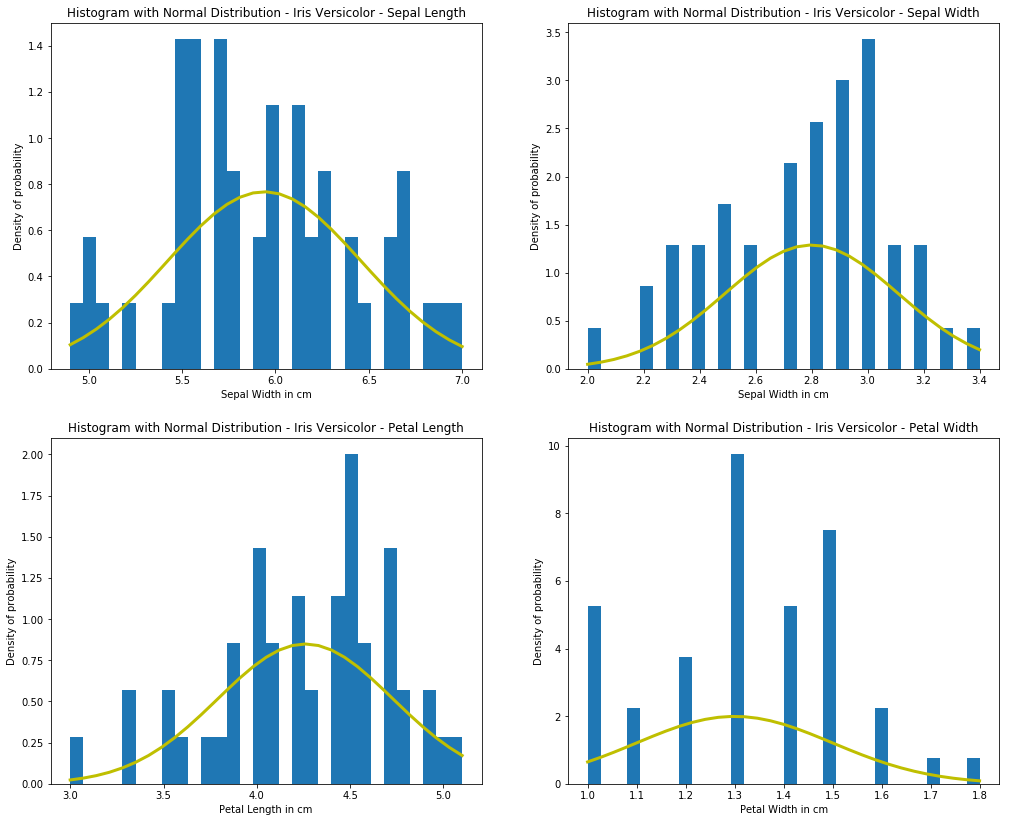

In [62]:
# https://www.tutorialspoint.com/python/python_normal_distribution.htm

plt.figure()

# Create a figure and a set of subplots with 2 columns and 2 rows.
fig, ax = plt.subplots(2,2, figsize=(17, 14))

# mean and standard deviation assigned to variables mu and s
mu, s = 5.94, 0.52

# our data
data = dfVersicolor['SepalLengthCm']

# we plot a histogram from which we read bins and assign them to variable
count, bins, ignored = ax[0][0].hist(data, 30, density=True)

# Plot the distribution curve from equation
ax[0][0].plot(bins, 1/(s * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * s**2) ), linewidth=3, color='y')

# we repeat steps for remaining data
mu, sigma = 2.8, 0.31
s = dfVersicolor['SepalWidthCm']
count, bins, ignored = ax[0][1].hist(s, 30, density=True)
ax[0][1].plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=3, color='y')

mu, sigma = 4.26, 0.47
s = dfVersicolor['PetalLengthCm']
count, bins, ignored = ax[1][0].hist(s, 30, density=True)
ax[1][0].plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=3, color='y')

mu, sigma = 1.3, 0.2
s = dfVersicolor['PetalWidthCm']
count, bins, ignored = ax[1][1].hist(s, 30, density=True)
ax[1][1].plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=3, color='y')

ax[0][0].set(
        title='Histogram with Normal Distribution - Iris Versicolor - Sepal Length', 
        xlabel = 'Sepal Width in cm', 
        ylabel = 'Density of probability')

ax[0][1].set(
        title='Histogram with Normal Distribution - Iris Versicolor - Sepal Width', 
        xlabel = 'Sepal Width in cm', 
        ylabel = 'Density of probability')

ax[1][0].set(
    title='Histogram with Normal Distribution - Iris Versicolor - Petal Length',
    xlabel = 'Petal Length in cm', 
    ylabel = 'Density of probability')

ax[1][1].set(
    title='Histogram with Normal Distribution - Iris Versicolor - Petal Width',
    xlabel = 'Petal Width in cm', 
    ylabel = 'Density of probability')

plt.show()

<Figure size 432x288 with 0 Axes>

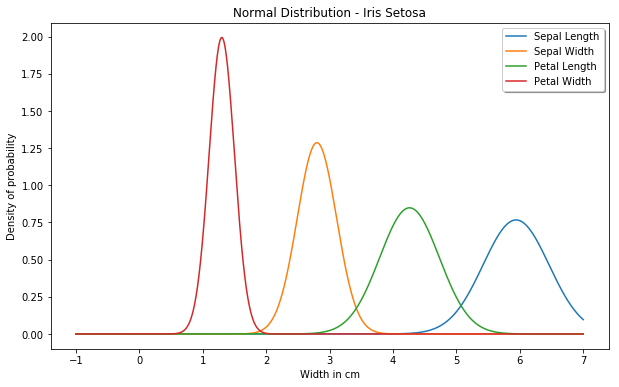

In [63]:
# https://stackoverflow.com/a/10138381/11107506

from scipy.stats import norm

plt.figure()

# Create a figure and a set of subplots with 2 columns and 2 rows.
fig, ax = plt.subplots(1,1, figsize=(10, 6))
x_axis = np.arange(-1, 7, 0.001)
ax.plot(x_axis, norm.pdf(x_axis,5.94, 0.52), label = 'Sepal Length' )
ax.plot(x_axis, norm.pdf(x_axis,2.8, 0.31), label = 'Sepal Width' )
ax.plot(x_axis, norm.pdf(x_axis,4.26, 0.47), label = 'Petal Length' )
ax.plot(x_axis, norm.pdf(x_axis,1.3, 0.2), label = 'Petal Width' )

plt.legend(
    loc='upper right',  
    shadow=True, 
    frameon = True)
ax.set(title='Normal Distribution - Iris Setosa', xlabel = 'Width in cm', ylabel = 'Density of probability')
plt.show()

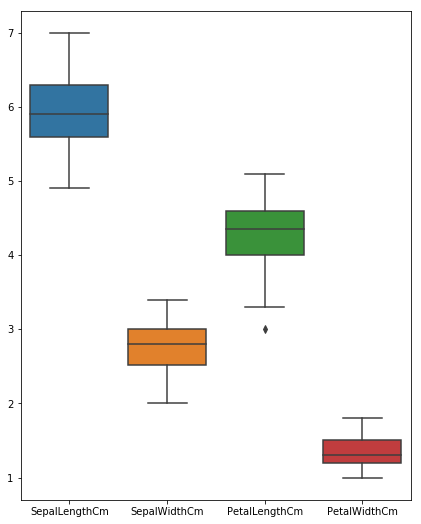

In [64]:
plt.figure(figsize=(7,9))
sns.boxplot(data=dfVersicolor,)

### Summary 

![pic](https://pbs.twimg.com/media/ChHAf21WYAAlh-v.jpg)


While working on the Iris Data Set, I realized how much time has to be spent to get satisfying results. I have the impression that the work I have done is only the tip of the iceberg.

I decided that I would conduct the analysis by treating each species of Iris Data Set separately using the same techniques on each species.

* Scatter plot with the trend line showed us that there is no dependence or is small between Sepal Length and Sepal Width.(But what is the relationship between Sepal and Petal?)
* Frequncy Chart showed us what is the distribution of length values for individual Sepal I Petal and using the Cross Table we showed the percentage distribution of values.

* We calculated average and Standard Deviation, which shows us that Iris Virginica has flowers 2 cm larger than other species.

* The 50 data points sample is too small to test this data for normal distribution. The Q-Q test and the Shapiro-Wilk test were designed to show the technique and learn to recognize data in a normal distribution. We can assume that the data in Iris Setosa have a normal distribution. So 68% of data points are within the range (plus or minus). Standard Deviation and 95% data points are distributed between -2 and 2 Standard Deviation values.
 
* Placing all 4 values in Boxplot allowed us to display data distribution based on the five number summary: minimum, first quartile, median, third quartile, and maximum

I learned a lot about Jupyter Notebook, Pandas, NumPy and MatplotLib libraries.

However, I feel the lack of knowledge about statistics and analysis of measurement errors. Last time I used these issues 15 years ago. This is an important element in the analysis of the data on which I have to work. Also, it is necessary to broaden and systematize knowledge in the field of Pandas, NumPa and data visualization techniques.

I encountered a few problems with Github, after sending Jupyter notebook to Github, it did not open in the browser. Probably it was caused by maintenance work, because the next day everything was working properly.

### References 

Iris Data set downloaded From

https://www.kaggle.com/saurabh00007/iriscsv

Fishers Notebook 

http://rcs.chemometrics.ru/Tutorials/classification/Fisher.pdf

http://patrickhoey.com/downloads/Computer_Science/03_Patrick_Hoey_Data_Visualization_Dataset_paper.pdf

https://www.britannica.com/biography/Ronald-Aylmer-Fisher

Styles in pandas and seaborn

https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

Iris flower image 

https://www.snaplogic.com/machine-learning-showcase/iris-flower-classification

Pandas split DataFrame by column value

https://stackoverflow.com/a/33742822/11107506

Charts

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

https://stackoverflow.com/a/45080859/11107506

https://medium.com/python-pandemonium/data-visualization-in-python-histogram-in-matplotlib-dce38f49f89c

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html

https://stackoverflow.com/a/26447505

https://pythonspot.com/matplotlib-legend/

Boxplot

https://seaborn.pydata.org/generated/seaborn.boxplot.html

Check is null in data frame

https://stackoverflow.com/a/29530559/11107506

cross table 

http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-19_17.html

https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.crosstab.html

https://pbpython.com/pandas-crosstab.html

font size 

https://stackoverflow.com/a/12444777/11107506

University of California, Irvine - Error Analysis

http://faculty.sites.uci.edu/chem2l/files/2011/04/RDGerroranal.pdf

Scatter plot definition - corelation  and NumPy polynomial Polyfit poly1d

https://www.numpy.org/devdocs/reference/generated/numpy.polynomial.polynomial.polyfit.html

https://chartio.com/learn/dashboards-and-charts/what-is-a-scatter-plot/

https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs/26447505#26447505

QQ Test and distribution 

https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

http://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html

Normal distribution

https://www.mathsisfun.com/data/standard-normal-distribution.html

https://en.wikipedia.org/wiki/Normal_distribution